# TSC Code Documentation

In what follows, we provide thorough documentation for the code developed for the purposes of the TSC project, where we aim to solve the Bogoliubov-de Gennes equations for superconductivity within the tight-binding approximation, including impurities.

## Theory

Before exploring the codebase, it is perhaps better to provide a summary of the underlying theory. Almost all equations and symbols are taken from [here](https://pergamos.lib.uoa.gr/uoa/dl/object/2941843/file.pdf), so feel free to read the full text for a more in-depth analysis.

### Hamiltonian

The second-quantization Hamiltonian used for the purposes of our study (after performing the mean-field approximation for superconductivity) can be written as

$$
H_0^{} = \sum_{\alpha,\alpha^\prime,i,j,\sigma,\sigma^\prime}{c_{\alpha i\sigma}^\dagger~ h_{\alpha i\sigma,\alpha^\prime j\sigma^\prime}^{}~ c_{\alpha^\prime j\sigma^\prime}^{}} + \sum_{\alpha ,i}{\Delta_{\alpha i}^{} c_{\alpha i\uparrow}^{\dagger}c_{\alpha i\downarrow}^{\dagger} + \Delta_{\alpha i}^{*} c_{\alpha i\downarrow}^{}c_{\alpha i\uparrow}^{}}~,
$$

where

$$
\Delta_{\alpha i}^{} = \Lambda_{\alpha i}^{} \chi_{\alpha i}^{}
$$

is the well-known order parameter for superconductivity. In this expression, $\Lambda_{\alpha i}$ is the effective coupling constant for the attractive electron-electron interaction and $\chi_{\alpha i}^{} = \langle c_{\alpha i\uparrow}^{}c_{\alpha i\downarrow}^{} \rangle$ is the anomalous density.

The indices $\alpha,\alpha^\prime$ correspond to lattice vectors $\mathbf{R}_\alpha^{}$ and $\mathbf{R}_{\alpha^\prime}^{}$, respectively, and assume values from 1 to $N$, where $N$ is the total number of lattice sites. The indices $i,j$ correspond to atom positions $\boldsymbol{\tau}_i^{}$ and $\boldsymbol{\tau}_j^{}$, respectively, in a lattice cell and assume values from 1 to $N_b^{}$, where $N_b^{}$ is the total number of atoms contained in this cell. As a result, the fermionic operators $c_{\alpha i\sigma}^{\dagger}$ and $c_{\alpha i\sigma}^{}$ create and annihilate, respectively, an electron of spin $\sigma$ ($\uparrow$ or $\downarrow$) at position $\mathbf{R}_\alpha^{} + \boldsymbol{\tau}_i^{}$.

Most importantly, we have

$$
h_{\alpha i\sigma,\alpha^\prime j\sigma^\prime}^{} = \left[- t_{\alpha i,\alpha^\prime j}^{} + \left(\varepsilon_{\alpha i}^{}-\mu\right)\delta_{\alpha \alpha^\prime }^{}\delta_{ij}^{}\right]\delta_{\sigma\sigma^\prime} - \left(\mathbf{B}_{\alpha i}^{}\cdot\boldsymbol{\sigma}\right)_{\sigma\sigma^\prime}\delta_{\alpha \alpha^\prime }^{}\delta_{ij}^{} + U_{\alpha i}^{}\left(n_{\alpha i}^{} - \bar{n}_{\alpha i}^{}\right)\delta_{\alpha \alpha^\prime }^{}\delta_{ij}^{} \delta_{\sigma\sigma^\prime}~,
$$

where $t_{\alpha i,\alpha^\prime j}^{}$ is the hopping element, $\varepsilon_{\alpha i}^{}$ is the self-energy, $\mu$ is the system's chemical potential, $\mathbf{B}_{\alpha i}^{}$ is an effective magnetic field which gives rise to a local Zeeman energy, $\boldsymbol{\sigma} \equiv \left(\boldsymbol{\sigma}_x^{}, \boldsymbol{\sigma}_y^{}, \boldsymbol{\sigma}_z^{}\right)$ is the Pauli vector, $n_{\alpha i}^{}$ is the charge density, $\bar{n}_{\alpha i}^{}$ is the desired value of that charge density and $U_{\alpha i}^{}$ is the so called local charge neutrality (LCN) coupling constant.

The hopping element is calculated as

$$
t_{\alpha i,\alpha^\prime j}^{} = t_0^{}\exp\left(-\frac{\left|\mathbf{R}_\alpha^{} + \boldsymbol{\tau}_i^{} - \mathbf{R}_{\alpha^\prime}^{} - \boldsymbol{\tau}_j^{}\right|}{R_0}\right)~,
$$

where $R_0^{}$ is a constant inserted for dimensional and normalization purposes and $t_0^{}$ is an atom-type dependent constant. This atom-type dependence can be written as

$$
t_0^{} \equiv t^{\textrm{I } \rightarrow \textrm{ J}} = t_\textrm{IJ}^{} \cdot \exp\left(\frac{\textrm{NN}\left(\textrm{I,J}\right)}{R_0}\right),
$$

where $t_\textrm{IJ}^{}$ is a constant that depends on the types I and J (where atom I hops on atom J) and $\textrm{NN}\left(\textrm{I,J}\right)$ is the nearest possible distance between two such atoms.

### BdG Equations

The real-space BdG Equations can be written in matrix form as

$$
\sum_{\alpha^\prime, j}{\boldsymbol{\mathcal{H}}_{\alpha i, \alpha^\prime j}^{0} \cdot \boldsymbol{\Psi}_{\alpha^\prime j}^{n}} = \epsilon_n^{} \boldsymbol{\Psi}_{\alpha i}^{n}~,
$$

where $\epsilon_n^{}$ is the eigenvalue corresponding to the eigenvector

$$
\boldsymbol{\Psi}_{}^{n} = \Big( \boldsymbol{u}_{\uparrow}^{n} ~ \boldsymbol{u}_{\downarrow}^{n} ~ \boldsymbol{v}_{\uparrow}^{n} ~ \boldsymbol{v}_{\downarrow}^{n} \Big)^{\rm T}~,
$$

where in turn $\boldsymbol{u}_{\sigma}^{n}$ and $\boldsymbol{v}_{\sigma}^{n}$ are $N_bN$-dimensional vectors containing the BdG equations' solutions for every lattice site and basis-atom.

The BdG Hamiltonian is a $4N_b^{}N\times 4N_b^{}N$ matrix, given by

$$
\boldsymbol{\mathcal{H}}_{\alpha i, \alpha^\prime j}^{0} =\left(  {\begin{array}{cccc}
    h_{\alpha i \uparrow, \alpha^\prime j \uparrow}^{} & h_{\alpha i \uparrow, \alpha^\prime j \downarrow}^{} & 0 & \Delta_{\alpha i}^{}\delta_{\alpha\alpha^\prime}^{}\delta_{ij}^{} \\
    h_{\alpha i \downarrow, \alpha^\prime j \uparrow}^{} & h_{\alpha i \downarrow, \alpha^\prime j \downarrow}^{} & \Delta_{\alpha i}^{}\delta_{\alpha\alpha^\prime}^{}\delta_{ij}^{} & 0 \\
    0 & \Delta_{\alpha i}^{*}\delta_{\alpha\alpha^\prime}^{}\delta_{ij}^{} & -h_{\alpha i \uparrow,  \alpha^\prime j \uparrow}^{*} & h_{\alpha i \uparrow,  \alpha^\prime j \downarrow}^{*} \\
    \Delta_{\alpha i}^{*}\delta_{\alpha\alpha^\prime}^{}\delta_{ij}^{} & 0 & h_{\alpha i \downarrow,  \alpha^\prime j \uparrow}^{*} & -h_{\alpha i \downarrow,  \alpha^\prime j \downarrow}^{*}
\end{array} } \right).
$$

Since the diagonalization of this matrix is a very computationally demanding process, one can use Bloch's theorem and switch to momentum space. By defining the Fourier transformation

$$
\boldsymbol{\Phi}_{i}^{n}\left(\mathbf{k}\right) \coloneqq \frac{1}{\sqrt{N}} \sum_{\alpha}{e^{-\text{i}\mathbf{k}\cdot\left(\mathbf{R}_\alpha^{}+\boldsymbol{\tau}_i^{}\right)}\boldsymbol{\Psi}_{\alpha i}^n}~,
$$

one can get the k-space BdG Hamiltonian as

$$
\tilde{\boldsymbol{\mathcal{H}}}_{i,j}^{0}\left(\mathbf{k}\right) = \sum_{\xi}{\boldsymbol{\mathcal{H}}_{0i,\xi j}^{0} ~e^{i\mathbf{k}\cdot \left(\mathbf{R}_\xi^{} + \boldsymbol{\tau}_{j}^{} - \boldsymbol{\tau}_{i}^{}\right)} }.
$$

### Computational Adaptation

In the following code, the BdG equations are solved in reciprocal space. The $4N_b^{}$-component spinor

$$
\boldsymbol{\Phi}_{}^n\left(\mathbf{k}\right) = \Big( \boldsymbol{u}_{\uparrow}^{n}\left(\mathbf{k}\right) ~ \boldsymbol{u}_{\downarrow}^{n}\left(\mathbf{k}\right) ~ \boldsymbol{v}_{\uparrow}^{n}\left(\mathbf{k}\right) ~ \boldsymbol{v}_{\downarrow}^{n}\left(\mathbf{k}\right) \Big)^{\rm T},
$$

where

$$
\boldsymbol{u}_{\sigma}^{n}\left(\mathbf{k}\right) = \Big(u_{1\sigma}^{n}\left(\mathbf{k}\right)~u_{2\sigma}^{n}\left(\mathbf{k}\right)~\cdots~u_{N_b^{}\sigma}^{n}\left(\mathbf{k}\right)\Big)^{\rm T}
$$

and

$$ \boldsymbol{v}_{\sigma}^{n}\left(\mathbf{k}\right) = \Big(v_{1\sigma}^{n}\left(\mathbf{k}\right)~v_{2\sigma}^{n}\left(\mathbf{k}\right)~\cdots~v_{N_b^{}\sigma}^{n}\left(\mathbf{k}\right)\Big)^{\rm T},
$$

incorporates the four-component spinors of all atoms in the unit cell. The BdG Hamiltonian per $\mathbf{k}$ is a $4 N_b^{} \times 4 N_b^{}$ matrix which is constructed as

$$
\tilde{\boldsymbol{\mathcal{H}}}_{}^{0}\left(\mathbf{k}\right) = \left(  {\begin{array}{cccc}
		\boldsymbol{h}_{\uparrow \uparrow}^{}\left(\mathbf{k}\right) & \boldsymbol{h}_{\uparrow \downarrow}^{}\left(\mathbf{k}\right) & 0 & \boldsymbol{\Delta}_{}^{}\\
		\boldsymbol{h}_{\downarrow \uparrow}^{}\left(\mathbf{k}\right) & \boldsymbol{h}_{ \downarrow \downarrow}^{}\left(\mathbf{k}\right) & \boldsymbol{\Delta}_{}^{} & 0 \\
		0 & \boldsymbol{\Delta}_{}^* & -\boldsymbol{h}_{\uparrow \uparrow}^{*}\left(\mathbf{k}\right) & \boldsymbol{h}_{\uparrow \downarrow}^{*}\left(\mathbf{k}\right) \\
		\boldsymbol{\Delta}_{}^{*} & 0 & \boldsymbol{h}_{\downarrow \uparrow}^{*}\left(\mathbf{k}\right) & -\boldsymbol{h}_{\downarrow \downarrow}^{*}\left(\mathbf{k}\right)
\end{array} } \right),
$$

where

$$
\boldsymbol{\Delta}_{}^{} = {\rm diag}\left(\Delta_1^{} ~ \Delta_2^{} ~ \cdots ~ \Delta_{N_b^{}}^{}\right)
$$

and

$$
\boldsymbol{h}_{\sigma \sigma^\prime}\left(\mathbf{k}\right) = \left(  {\begin{array}{cccc}
		h_{1 \sigma, 1 \sigma^\prime}^{}\left(\mathbf{k}\right) & h_{1 \sigma, 2 \sigma^\prime}^{}\left(\mathbf{k}\right) & \dots & h_{1 \sigma, N_b^{} \sigma^\prime}^{}\left(\mathbf{k}\right)\\
		h_{2 \sigma, 1 \sigma^\prime}^{}\left(\mathbf{k}\right) & h_{2 \sigma, 2 \sigma^\prime}^{}\left(\mathbf{k}\right) & \dots & h_{2 \sigma, N_b^{} \sigma^\prime}^{}\left(\mathbf{k}\right) \\
		\vdots & \vdots & \ddots & \vdots \\
		h_{N_b^{} \sigma, 1 \sigma^\prime}^{}\left(\mathbf{k}\right) & h_{N_b^{} \sigma, 2 \sigma^\prime}^{}\left(\mathbf{k}\right) & \dots & h_{N_b^{} \sigma, N_b^{} \sigma^\prime}^{}\left(\mathbf{k}\right)
\end{array} } \right).
$$

The matrix elements of $\boldsymbol{h}_{\sigma \sigma^\prime}\left(\mathbf{k}\right)$ are calculated as indicated by the Fourier transform defined above. The BdG equations per $\mathbf{k}$ are therefore written as

$$
\tilde{\boldsymbol{\mathcal{H}}}_{}^{0}\left(\mathbf{k}\right) \cdot \boldsymbol{\Phi}_{}^n\left(\mathbf{k}\right) = \epsilon_n^{} \boldsymbol{\Phi}_{}^n\left(\mathbf{k}\right)
$$

### Self-consistency & Observables

There are two different self-consistency cycles: one for the normal state (i.e. no superconductivity) and one for the superconducting system.

#### Normal state (metal)

During the first self-consistency cycle, the quantities that are self-consistently calculated are the charges per atom, given as

$$
n_{i}^{} = \frac{1}{N}\sum_{\mathbf{k}}{n_{i}\left(\mathbf{k}\right)} = \frac{1}{N}\sum_{\mathbf{k},n,\sigma}{|u_{i\sigma}^n\left(\mathbf{k}\right)|^2 f\left(\epsilon_n^{}\right)}
$$

as well as the chemical potential of the system, $\mu$. The convergence criterion is

$$
\left|n_i^\textrm{new} - n_i^\textrm{prev}\right| < \epsilon_m, \hspace{5mm} \forall i \hspace{8mm} \text{and}
$$


ΤΟΔΟ



and the order parameter per atom

$$
\Delta_{i}^{} = \frac{\Lambda_i^{}}{N}\sum_{\mathbf{k}}{\chi_{i}\left(\mathbf{k}\right)} = -\frac{\Lambda_i}{N} \sum_{\mathbf{k},n}{u_{i\downarrow}^{n}\left(\mathbf{k}\right)v_{i\uparrow}^{n*}\left(\mathbf{k}\right) f\left(\epsilon_n\right)}.
$$

These are measured self-consistently, i.e. an initial guess is made for their values and then the BdG Equations are solved until the difference for their values between two consecutive runs is smaller than a predefined threshold. The function that appears in the above equations is the Fermi function, defined as

$$
f\left(\epsilon_n\right) = \frac{1}{1+\exp\left(\epsilon_n/k_BT\right)} .
$$

Note at this point that there are two different self-consistency cycles: one for the normal metal state (i.e. no superconductivity) and one for the superconducting system. During the first cycle, the quantities that are self-consistently calculated are the chagres (using the above formula) 

also, that the chemical potential, $\mu$, is calculated self-consistently, based on the values of the charges. For the calculation of the chemical potential, the density of states at $\mu$ is required. For the density of states, we use the Lorentzian approximation of the delta function:

$$
\mathcal{D}_i\left(E\right) = \frac{\Gamma}{\pi}\frac{1}{N_k}\sum_{\mathbf{k},n,\sigma}{\frac{|u_{i\sigma}^n\left(\mathbf{k}\right)|^2}{\Gamma^2 + \left(E-\varepsilon_n\right)^2}}~,
$$

where $\mathcal{D}_i\left(E\right)$ is the DOS at energy $E$ for atom $i$.

TODO: FOR THE METAL IT DOES NOT NEED THE WAVEFUNCTIONS, IT DOES FOR THE SC

### Impurities

TODO

## Basic Setup

### Environment Setup

The code should preferably be executed in an isolated conda environment. To make one such environment, first run:

```
conda create --name TSC
```

This will create an environment, named TSC. Then, use `conda activate TSC` to activate the newly created environment and run

```
conda install -c conda-forge jupyterlab
```

to install Jupyter Lab (which is the suggested runtime for the project). Once Jupyter Lab is installed, run

```
conda install -c conda-forge plotly matplotlib numpy scipy numba
```

to install the additional dependencies (NumPy, SciPy for optimized code, Plotly for plotting, etc.).

### Code

Let's start by importing all necessary libraries.

In [33]:
import numpy as np
import scipy as sp
import numba

import copy

First, we import the config object, so that we can pass its contents as global variables. One of the main parameters is the type of lattice, with choices between Simple Cubic (SC), Body-Centered Cubic (BCC) and Face-Centered Cubic (FCC). The `config.py` file located in the `tsc` folder contains thorough documentation for each of the configuration variables.

In [34]:
from tsc import config

# Get config variables
globals().update({k: v for k, v in vars(config.Config).items() if not k.startswith("__")})

The next cell essentially constructs the real-space lattice, by creating $(2N_\textrm{CELLS}+1)^3$ lattice vectors. The cell after it performs a simple visualization for $N_\textrm{CELLS}=1$.

In [35]:
from tsc.utilities import get_RPTS

# Construct the lattice sites matrix
RPTS = get_RPTS(a_1, a_2, a_3, NCELLS)

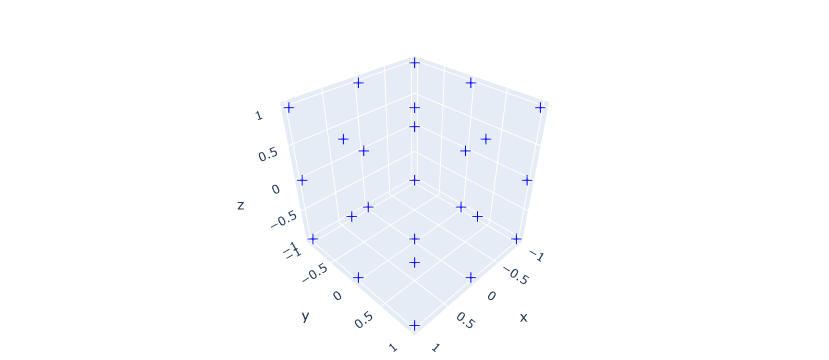

In [36]:
from tests.doc_plots import plot_lattice

plot_lattice(RPTS)

The blue points in the figure above correspond to lattice sites, but the lattice has not yet been populated. To populate the lattice, we must also include basis atoms. These are generated from functions inside the `basis_atoms.py` file. The example below uses two types of basis atoms: one of type 1 and one of type 2. In general, types correspond to different elements.

In [62]:
from tsc.basis_atoms import single_atom, extract_atom_vectors

# Call functions from basis_atoms.py to get atoms
atom_1 = single_atom(x = 0.0, y = 0.0, z = 0.0, atom_type = 1, E_0 = 0.0, U = 0.0, 
                     n_bar = 0.4, B_x = 0.0, B_y = 0.0, B_z = 0.5, Λ = 0.0)
atom_2 = single_atom(x = 0.2, y = 0.2, z = 0.2, atom_type = 2, E_0 = 0.4, U = 0.5, 
                     n_bar = 1.0, B_x = 0.5, B_y = 0.2, B_z = 0.5, Λ = 0.0)

# Stack the results to get the basis atoms array
atoms = np.vstack((atom_1,atom_2))
#atoms = atom_1

# Extract the vectors from the called function
TPTS, atom_types, E_0, U, n_bar, B, Λ = extract_atom_vectors(atoms)

# Write down the number of basis atoms
N_b: int = TPTS.shape[0]

The parameters here correspond to the basis atom's position on the lattice ($x$,$y$,$z$), its type, its on-site energy ($\varepsilon_i$ in theory), its local charge neutrality constant ($U_i$ in theory), its desired charge ($\bar{n}_i$ in theory), its local Zeeman field ($\mathbf{B}_i$ in theory) and its effective coupling constant ($\Lambda_i$ in theory).

The following graph depicts the basis atoms populating the lattice that we previously set up.

In [63]:
from tests.doc_plots import plot_atoms

#plot_atoms(RPTS,TPTS)

## Optimization Intermission

With the basic setup complete, and before we move on with the setup of the Hamiltonian, we will compute some matrices that will come in handy further down the road. The tight-binding approximation works for a number of neighbours that are within a sphere of radius $R_\textrm{max}$; all other hoppings are considered impossible. However, there are many places throughout the codebase where distances need to be taken into account by looping over `RPTS` and `TPTS`. To avoid calculating all distances for every atom, every time we need to, we spare some time to calculate only the absolutely necessary distances (as well as atom-type connections).

The fist step for this is to calculate the exact number of neighbours for each atom. Note that the functions used here are by no means optimized. However, the thing we are trying to optimize in terms of runtime is the self-consistency cycles, which include the diagonalization of a matrix - this is the most time-costly process in the code. Things that are not really optimized (for example using vectorization) but run only once are okay (especially if we njit them for cases when we need to run many different scripts and configurations).

In [64]:
from tsc.utilities import get_nndists

# Get an array with the number of neighbours per atom
num_neighbs = get_nndists(RPTS, TPTS, R_max)

Now that we have the number of each atom's neighbours, we proceed to calculate all the allowed (i.e. smaller than $R_\textrm{max}$) distances for each of them. Additionally, we get a list of all neighbouring combinations I, J when it comes to atom types.

In [65]:
from tsc.utilities import get_connections

# Get the maximum number of neighbours
max_neighb = num_neighbs.max()

# Get the type_IJ and Rvec_ij matrices
type_IJ, Rvec_ij = get_connections(max_neighb, RPTS, TPTS, R_max)

Essentially, `type_IJ[i,:]` corresponds to the types of neighbours of atom `i`. For example,

In [66]:
print(type_IJ[0,:])

[0 0 0 0 0 0 1 1 1 1]


Similarly, `Rvec_ij[i,:,:]` is a 2D array that corresponds to basis atom `i`. Each row in it represents the relative position vector from itom `i` to one of its neighbours. For example, 

In [67]:
print(Rvec_ij[0,:,:])

[[-1.   0.   0. ]
 [ 0.  -1.   0. ]
 [ 0.   0.  -1. ]
 [ 0.   0.   1. ]
 [ 0.   1.   0. ]
 [ 1.   0.   0. ]
 [-0.8  0.2  0.2]
 [ 0.2 -0.8  0.2]
 [ 0.2  0.2 -0.8]
 [ 0.2  0.2  0.2]]


The reader may have noticed that, instead of calculating each atom's number of neighbours and then calculating these connections, we could have done it simultaneously and then padded the connections with zeros to get the same results. Again, code readability is more important in this case, since the optimization of less than a few seconds is not a good tradeoff.

Closing this section, we remark that the `type_IJ` and `Rvec_ij` arrays have been created within the same loop (the `num_neighbs` array as well), so from now on we do not need to loop over TPTS and RPTS anymore, as we have everything we need in these connection arrays. This was the optimization we were looking for, even though it might seem counter-intuitive that we achieved it using very not-optimized functions.

## Hamiltonian Preparations

Okay, we lied. As you will see, we will loop over RPTS and TPTS for one final time (we will explain why). Our goal now is to setup the things necessary to define our Hamiltonian.

### Hopping Element Constants

Our purpose is first to calculate the atom-dependent constants of the hopping elements. To do this, we first count the number of unique atoms, `N_unique`, and also re-encode the atom types (for instance, if a user submits atom types using random numbers, we must re-type them using indices starting from 0 and increasing for each new atom type).

In [68]:
# Get the number of different atom types based on the basis_atoms configuration
# Also re-encode the atom_types as 0, 1, 2, etc.
unique_atoms, atom_types = np.unique(atom_types, return_inverse=True)
N_unique: int = unique_atoms.shape[0]

We then proceed to execute the `hopping_terms` function, which calculates the $t_0$ constants for each type of basis atom. One of its inputs is the `hop_mat` array, which corresponds to the hand-inserted $t_\textrm{IJ}$ elements (see Theory). Our choice for the following example is the completely symmetrical case.

In [69]:
# Construct a completely symmetrical case
hop_mat = np.ones((N_unique, N_unique))

In [70]:
from tsc.hamiltonian import hopping_consts

# Get the hopping terms
t_0 = hopping_consts(hop_mat, atom_types, TPTS, RPTS, R_0)

For those who may be wondering why we followed the **highly** non-optimized approach of 5 for-loops to calculate the hopping constants, the answer is that we could have done it using the `type_IJ` and `Rvec_ij` arrays. Nonetheless, the `Rvec_ij` array is usually padded with zeros, since not all atoms have the same number of neighbours, and this padding needs very delicate handling to avoid getting unphysical results. So, for one last time, we gave in to using the "non-optimal" approach. But this was truly the last time you'll ever hear (or read) about the TPTS and RPTS arrays. As a matter of fact, we can now calculate the actual hopping elements, as follows:

In [71]:
from tsc.hamiltonian import hopping_elements

# Get the hopping elements
t = hopping_elements(type_IJ, num_neighbs, Rvec_ij, atom_types, t_0, R_0)

### Momentum space

The building blocks to start constructing the Hamiltonian are ready. However, for computational reasons, the Hamiltonian must be constructed in $k$-space, as explained in Theory. So, we first define the $k$-mesh.

In [72]:
from tsc.utilities import get_KPTS

# Get a k-mesh with resolution that depends on N_x, N_y, N_z
KPTS = get_KPTS(a_1, a_2, a_3, N_x, N_y, N_z)

Then, using the $k$-mesh, we may calculate the Fourier exponentials, as we don't need to calculate them anew every time we setup the Hamiltonian.

In [73]:
from tsc.hamiltonian import get_exponentials

# Get the exponentials
fourier = get_exponentials(Rvec_ij, KPTS)

Finally, we have all the ingredients to start building the Hamiltonian during self-consistency cycles. Note that during them the $k$-space Hamiltonian will be diagonalized once per $k$ value. However, we don't have to setup the whole Hamiltonian from scratch for every $k$ value. For this reason, we split the construction of the Hamiltonian into two functions. First, comes the `prep_hamiltonian()` function, which builds the $4N_b\times 4N_b$ Hamiltonian (see Theory) without the hopping elements. With the "prepared" Hamiltonian, we may then move on to the actual $k$-space Hamiltonian, for every value of $k$, where we also incorporate the hopping element accordingly, by calling the `get_hamiltonian()` function. These are performed in the next section, as part of the self-consistency routine.

## Self-consistency

TODO: Add description

In [74]:
from tsc.hamiltonian import prep_N_hamiltonian, get_N_hamiltonian
from tsc.utilities import fermi

In [75]:
# First, initialize the values of μ and n based on their config values
μ = μ_0
n = np.ones((N_b))*n_0

# Submit the maximum number of self-consistency cycles
maxreps = 50

print(f"Initializing self-consistency procedure (Normal case) for a maximum of {maxreps} cycles.")
for rep in range(maxreps):
    
    # Create placeholder arrays for the eigenvalues and eigenvectors
    E_vals, E_vecs = np.zeros((2*N_b*N_k)), np.zeros((2*N_b, 2*N_b*N_k), dtype=np.complex128)

    # prepare the Hamiltonian
    H_prep = prep_N_hamiltonian(E_0, μ, U, n, n_bar, B, s_0, s_1, s_2, s_3)
    
    for k in range(N_k):
        # Get a deepcopy of H_prep so that we don't have to re-generate it
        H_copied = copy.deepcopy(H_prep)
        # Get a new H(k) for every k
        H = get_N_hamiltonian(k, H_copied, type_IJ, num_neighbs, fourier, t)

        # Diagonalize H(k)
        w, v = sp.linalg.eigh(H)

        # Store results
        ini: int = k*2*N_b
        fin: int = (k+1)*2*N_b
        E_vals[ini:fin] = w
        E_vecs[:, ini:fin] = v

    # ---------------------------------------------------------
    # At this point the diagonalization has finished
    # so we move forward to calculations based on results
    # ---------------------------------------------------------
    
    # Some splitting for easier reading
    u_ups, u_downs = E_vecs[:N_b, :], E_vecs[N_b:, :]

    # Helper calculations
    ferm_e = fermi(E_vals, T, k_B)
    u_up_squared = np.abs(u_ups)**2
    u_down_squared = np.abs(u_downs)**2

    # Calculations for charges and chemical potential
    n_up = (ferm_e * u_up_squared).sum(axis=1) / N_k
    n_down = (ferm_e * u_down_squared).sum(axis=1) / N_k
    DOS_at_μ = (Γ/np.pi)*(1.0/N_k)*((u_up_squared+u_down_squared)/(Γ**2 + (E_vals-μ)**2)).sum()

    n_new = n_up + n_down
    μ_new = μ - 0.2*np.arctan((n_new-n_bar).sum()/DOS_at_μ)
    
    # We can also calculate the magnetization for completeness
    m = n_up-n_down

    # Set conditions to see if loop breaks (before updating the values)
    cond_n = (np.abs(n_new - n) > e_metal).any()
    cond_μ = np.abs(μ_new - μ) > e_metal
    
    # Update n and μ
    n = (1.0-mix_n)*n + mix_n*n_new
    μ = μ_new

    # Some statistics
    if rep % 10 == 0:
        print(f"Finished run No. {rep+1}.")
        N, M = n.sum()/N_b, m.sum()/N_b
        print(f"The current value for μ is {μ:.3f}. The total charge is {N:.3f}, while the total magnetization is {M:.3f}.")

    # Check if the loop should be broken (convergence achieved)
    if not (cond_n or cond_μ):
        break

print(f"Self-consistency procedure (Normal case) finished.")

Initializing self-consistency procedure (Normal case) for a maximum of 50 cycles.
Finished run No. 1.
The current value for μ is -0.028. The total charge is 0.407, while the total magnetization is 0.151.
Finished run No. 11.
The current value for μ is -0.652. The total charge is 0.640, while the total magnetization is 0.125.
Finished run No. 21.
The current value for μ is -0.699. The total charge is 0.681, while the total magnetization is 0.124.
Finished run No. 31.
The current value for μ is -0.700. The total charge is 0.694, while the total magnetization is 0.124.
Finished run No. 41.
The current value for μ is -0.699. The total charge is 0.698, while the total magnetization is 0.124.
Self-consistency procedure (Normal case) finished.


In [83]:
def get_dos(E_vecs: np.ndarray, E_vals: np.ndarray, intervals: int, N_b: int) -> Tuple[np.ndarray, np.ndarray]:
    # Get the energies and make an energy grid
    Es = np.linspace(E_vals.min(),E_vals.max(),intervals)
    # Setup an array to hold the DoS values
    DOS = np.zeros((N_b,intervals))

    # Extract wavefunctions for electrons
    u_ups, u_downs = E_vecs[:N_b, :], E_vecs[N_b:2*N_b, :]
    u_up_squared = np.abs(u_ups)**2
    u_down_squared = np.abs(u_downs)**2
    
    for idx, E in enumerate(Es):
        DOS[:,idx] = (Γ/np.pi)*(1.0/N_k)*((u_up_squared+u_down_squared)/(Γ**2 + (E_vals-E)**2)).sum(axis=1)

    return Es, DOS

In [49]:
from tsc.hamiltonian import prep_SC_hamiltonian, get_SC_hamiltonian

In [53]:
# First, initialize the values of μ, n and Δ based on their config values
μ = μ_0
n = np.ones((N_b))*n_0
Δ = np.ones((N_b), dtype=np.complex128)*Δ_0

# Submit the maximum number of self-consistency cycles
maxreps = 50

print(f"Initializing self-consistency procedure (SC case) for a maximum of {maxreps} cycles.")
for rep in range(maxreps):
    
    # Create placeholder arrays for the eigenvalues and eigenvectors
    E_vals, E_vecs = np.zeros((4*N_b*N_k)), np.zeros((4*N_b, 4*N_b*N_k), dtype=np.complex128)

    # prepare the Hamiltonian
    H_prep = prep_SC_hamiltonian(E_0, μ, U, n, n_bar, B, Δ, s_0, s_1, s_2, s_3)
    
    for k in range(N_k):
        # Get a deepcopy of H_prep so that we don't have to re-generate it
        H_copied = copy.deepcopy(H_prep)
        # Get a new H(k) for every k
        H = get_SC_hamiltonian(k, H_copied, type_IJ, num_neighbs, fourier, t)

        # Diagonalize H(k)
        w, v = sp.linalg.eigh(H)

        # Store results
        ini: int = k*4*N_b
        fin: int = (k+1)*4*N_b
        E_vals[ini:fin] = w
        E_vecs[:, ini:fin] = v

    # ---------------------------------------------------------
    # At this point the diagonalization has finished
    # so we move forward to calculations based on results
    # ---------------------------------------------------------
    
    # Some splitting for easier reading
    u_ups, u_downs, v_ups, v_downs = E_vecs[:N_b,:], E_vecs[N_b:2*N_b,:], E_vecs[2*N_b:3*N_b,:], E_vecs[3*N_b:,:]

    # Helper calculations
    ferm_e = fermi(E_vals, T, k_B)
    u_up_squared = np.abs(u_ups)**2
    u_down_squared = np.abs(u_downs)**2

    # Calculations for charges and chemical potential
    n_up = (ferm_e * u_up_squared).sum(axis=1) / N_k
    n_down = (ferm_e * u_down_squared).sum(axis=1) / N_k
    DOS_at_μ = (Γ/np.pi)*(1.0/N_k)*((u_up_squared+u_down_squared)/(Γ**2 + (E_vals-μ)**2)).sum()

    n_new = n_up + n_down
    μ_new = μ - 0.2*np.arctan((n_new-n_bar).sum()/DOS_at_μ)
    
    # We can also add magnetization here
    m = n_up-n_down

    # Set conditions to see if loop breaks (before updating the values)
    cond_n = (np.abs(n_new - n) > e_metal).any()
    cond_μ = np.abs(μ_new - μ) > e_metal
    
    # Update n, μ and Δ
    n = (1.0-mix_n)*n + mix_n*n_new
    μ = μ_new

    # Some statistics
    if rep % 10 == 0:
        print(f"Finished run No. {rep+1}.")
        N, M = n.sum()/N_b, m.sum()/N_b
        print(f"The current value for μ is {μ:.3f}. The total charge is {N:.3f}, while the total magnetization is {M:.3f}.")

    # Check if the loop should be broken (convergence achieved)
    if not (cond_n or cond_μ):
        break

print(f"Self-consistency procedure (SC case) finished.")

Initializing self-consistency procedure (SC case) for a maximum of 50 cycles.
16000
Finished run No. 1.
The current value for μ is -0.129. The total charge is 0.417, while the total magnetization is 0.132.
16000
16000
16000
16000
16000
16000
16000


KeyboardInterrupt: 